<a href="https://colab.research.google.com/github/IvanBaroni/AulasUSP/blob/master/IGN_Games_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IGN Games - Exploratory Analysis.
*by  Ivan Baroni*

For practice purposes, let's assume IGN has reviewed every game ever released for the platforms listed here, and all the data is included in this dataset from Kaggle.

**QUESTIONS**

1. What is the average score by **Platform**?

2. What is the average score by **Manufacturer**?

3. What is the average score by **Genre**?

4. What's the main difference for games that are **editors choice**?

5. What can we learn from the main features **over time** ?

6. How long has each **platform** had games released?

7. What **time of the year** do we have more game launches?

8. What are the 3 best games by **Platform**?

9. What is the best and the worst game for each **Genre**?

10. What are the words most often used on **Game Titles**?



# Importing the Dataset

In [1]:
#Libraries

# Data manipulation basics
import pandas as pd                     # Used for data manipulation and analysis
import numpy as np                      # Used for numerical operations
import statsmodels.api as sm            # Used for statistical modeling

# Data Viz
import matplotlib.pyplot as plt         # Used for creating static, animated, and interactive visualizations
import seaborn as sns                   # Used for making statistical graphics
import plotly.express as px             # Used for creating interactive plots
import plotly.graph_objects as go       # Used for creating custom interactive plots

# Google Docs importing
import io                               # Used for handling I/O operations
import requests                         # Used for making HTTP requests

# Word count / Word Cloud
!pip install wordcloud  > /dev/null
from wordcloud import WordCloud         # Used for creating word clouds
from collections import Counter         # Used for counting hashable objects
import re                               # Used for regular expression operations
import os                               # Used for interacting with the operating system
import nltk                             # Used for natural language processing
from nltk.corpus import stopwords       # Used for filtering out stop words

# ydata profiling
!pip install ydata-profiling > /dev/null
from ydata_profiling import ProfileReport # Used for generating profile reports from a pandas DataFrame

In [2]:
# Importing Dataset

url = "https://raw.githubusercontent.com/TheSarang/IGN-20-years-of-Games-Analysis/master/ign.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.text))

df.head()

Unnamed: 0 score_phrase                                              title  \
0           0      Amazing                            LittleBigPlanet PS Vita   
1           1      Amazing  LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2           2        Great                               Splice: Tree of Life   
3           3        Great                                             NHL 13   
4           4        Great                                             NHL 13   

                                                 url          platform  score  \
0             /games/littlebigplanet-vita/vita-98907  PlayStation Vita    9.0   
1  /games/littlebigplanet-ps-vita-marvel-super-he...  PlayStation Vita    9.0   
2                          /games/splice/ipad-141070              iPad    8.5   
3                      /games/nhl-13/xbox-360-128182          Xbox 360    8.5   
4                           /games/nhl-13/ps3-128181     PlayStation 3    8.5   

        genre editors_choice  release_year  release_month  release_day  
0  Platformer              Y          2012              9           12  
1  Platformer              Y          2012              9           12  
2      Puzzle              N          2012              9           12  
3      Sports              N          2012              9           11  
4      Sports              N          2012              9           11

## Quick exploratory analysis

In [3]:
df_summary = pd.DataFrame({
    'Null Count': df.isnull().sum(),
    'Unique Count': df.nunique(),
    'Type': df.dtypes
    })

display(df_summary)

print(f"The dataframe has {df.shape[0]:,} rows and {df.shape[1]:,} columns.")

Null Count  Unique Count     Type
Unnamed: 0               0         18625    int64
score_phrase             0            11   object
title                    0         12589   object
url                      0         18577   object
platform                 0            59   object
score                    0            93  float64
genre                   36           112   object
editors_choice           0             2   object
release_year             0            22    int64
release_month            0            12    int64
release_day              0            31    int64

The dataframe has 18,625 rows and 11 columns.


In [4]:
# correct a faulty register

# Rename the "Unnamed: 0" column to "id"
df = df.rename(columns={'Unnamed: 0': 'id'})

# Change the release date for the row with id == 516
df.loc[df['id'] == 516, ['release_year', 'release_month', 'release_day']] = [2012, 4, 24]

# Display the updated row to confirm the change
display(df[df['id'] == 516])

id score_phrase                                              title  \
516  516        Great  The Walking Dead: The Game -- Episode 1: A New...   

                                                   url  platform  score  \
516  /games/the-walking-dead-season-1-episode-1/xbo...  Xbox 360    8.5   

         genre editors_choice  release_year  release_month  release_day  
516  Adventure              N          2012              4           24

In [5]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 12.48it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 1) What is the average score by **Platform**?

In [6]:
# @title 1.1 Score by Platform Table
avg_score_by_platform = df.groupby('platform')['score'].mean().round(3).reset_index()
platform_counts = df['platform'].value_counts().reset_index()

platform_counts.columns = ['platform', 'count']

platform_analysis = pd.merge(avg_score_by_platform, platform_counts, on='platform')
platform_analysis.style.bar(subset=['score'], color='#FFBBBB', props='border: 1px solid white;')

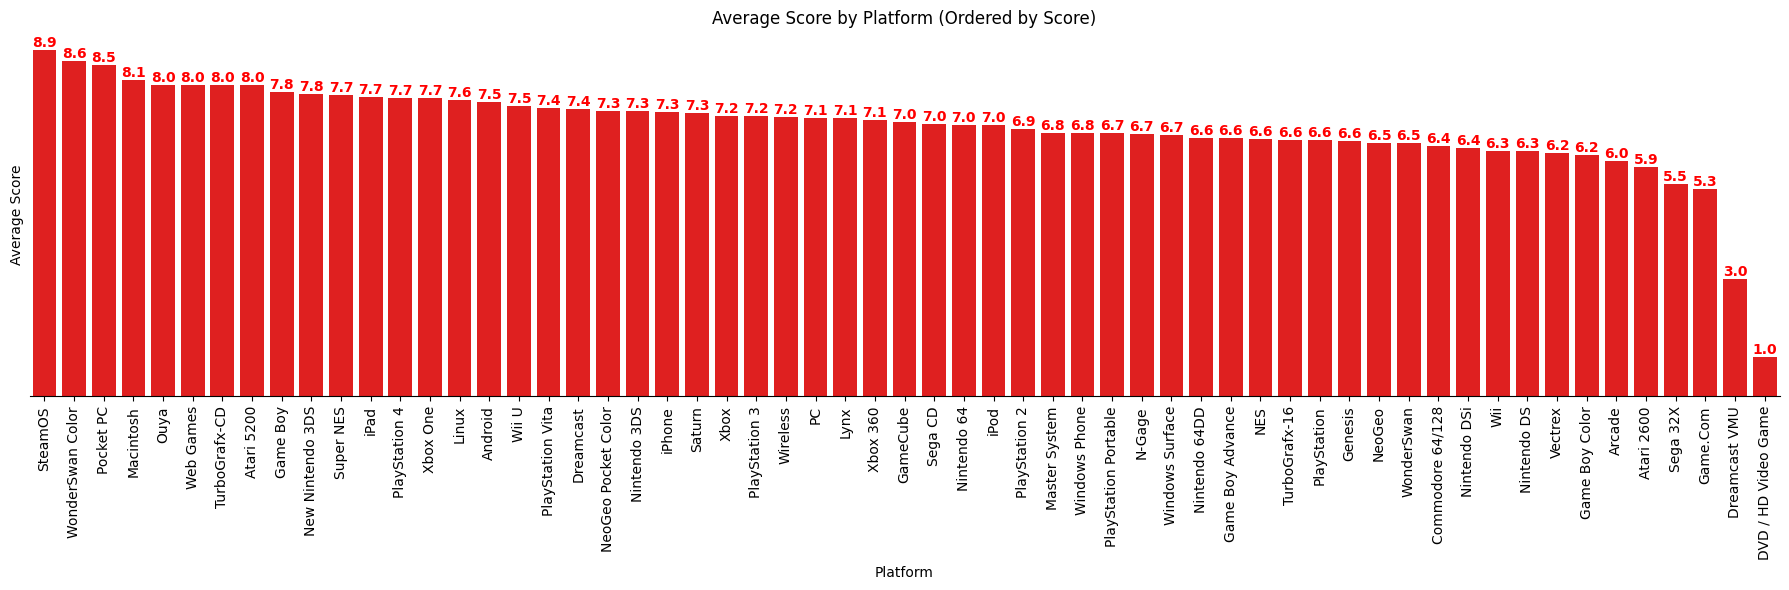

In [7]:
# @title 1.2 Bar Chart - Score by Platform
# Order by score
platform_analysis_sorted = platform_analysis.sort_values(by='score', ascending=False)

# Plotting
plt.figure(figsize=(18, 6))
ax = sns.barplot(x='platform', y='score', data=platform_analysis_sorted, color='red')
plt.xticks(rotation=90)
plt.title('Average Score by Platform (Ordered by Score)')
plt.xlabel('Platform')
plt.ylabel('Average Score')

# Add score numbers on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', color='red',  weight='bold')

# Visual details
ax.set_yticks([]) # Hide y-axis labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

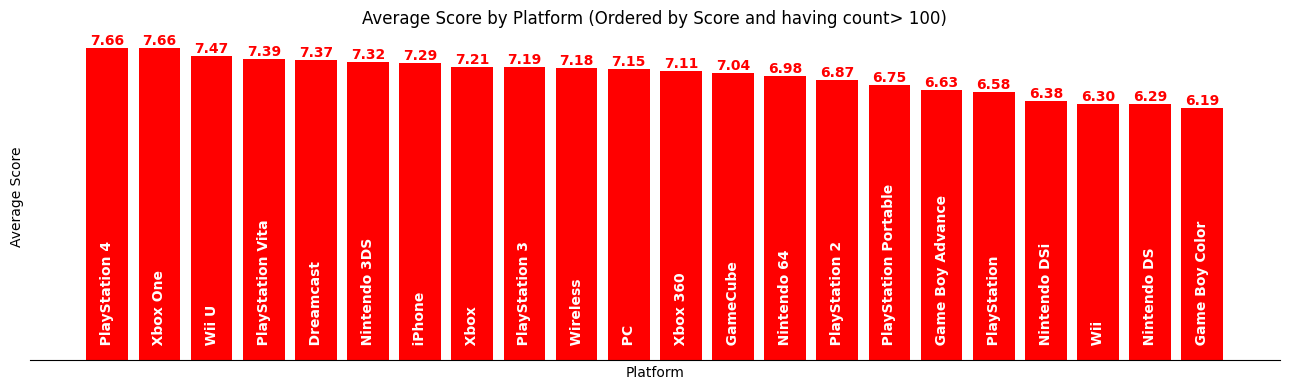

In [8]:
# @title 1.3 Bar Chart - Score by Platform Filtered
# Filter by count
platform_analysis_filtered = platform_analysis[platform_analysis['count'] > 100]
platform_analysis_filtered

# Order by score
platform_analysis_sorted = platform_analysis_filtered.sort_values(by='score', ascending=False)

# Plotting with matplotlib only
plt.figure(figsize=(13, 4))
ax = plt.bar(platform_analysis_sorted['platform'], platform_analysis_sorted['score'], color='red')

plt.title('Average Score by Platform (Ordered by Score and having count> 100)')
plt.xlabel('Platform')
plt.ylabel('Average Score')
plt.xticks(rotation=90)

# Add score numbers on top of bars and platform names inside bars at the base
for i, (platform, score) in enumerate(zip(platform_analysis_sorted['platform'], platform_analysis_sorted['score'])):
    # Add score numbers on top of bars
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom', color='red', weight='bold')
    # Add platform names inside bars at the base
    plt.text(i, 0, "   "+platform, ha='center', va='bottom', color='white',  weight='bold', rotation=90, fontsize=10)

# Visual details
ax = plt.gca() # Get the current axes
ax.set_yticks([]) # Hide y-axis labels
ax.set_xticks([]) # Hide y-axis labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

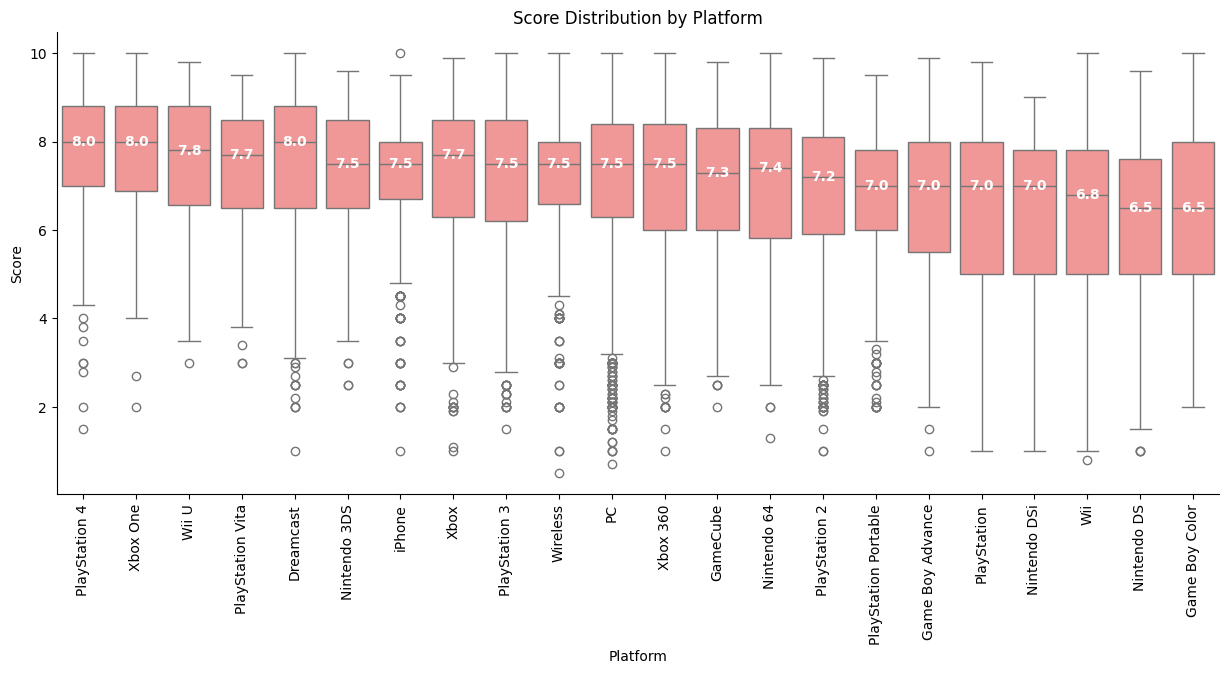

In [9]:
# @title 1.4 Boxplot for Platform
# Generate a boxplot for 'platform' using 'score'
plt.figure(figsize=(15, 6)) # Increased figure height to better accommodate min/max labels

# Calculate the average score for each platform and order the platforms by average score
platform_order = df[df['platform'].isin(platform_analysis_filtered['platform'])].groupby('platform')['score'].mean().sort_values(ascending=False).index

ax = sns.boxplot(x='platform', y='score', data=df[df['platform'].isin(platform_analysis_filtered['platform'])], color='#FF8888', order=platform_order)
plt.title('Score Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Score')
plt.xticks(rotation=90)


# Add median labels to the boxplot
medians = df[df['platform'].isin(platform_analysis_filtered['platform'])].groupby(['platform'])['score'].median().reindex(platform_order)
for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.1f}', ha='center', va='center', color='white', weight='bold')


# Make the square around the chart invisible
ax = plt.gca() # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# 2) What is the average score by **Manufacturer**?

In [10]:
# @title 2.1 Import Manufacturer Data
sheet_url = "https://docs.google.com/spreadsheets/d/1O-7U1alPypICeYWkjbs0HwPODcqYaI2dS7IlJJNZyW8/edit?usp=sharing"
sheet_url = sheet_url.replace('/edit?usp=sharing', '/export?format=csv')

df_manufacturer = pd.read_csv(sheet_url)

# Merge the original dataframe with the manufacturer dataframe
df = pd.merge(df, df_manufacturer, left_on='platform', right_on='platform', how='left')

print(df[['platform', 'manufacturer']].head())

           platform manufacturer
0  PlayStation Vita         Sony
1  PlayStation Vita         Sony
2              iPad        Apple
3          Xbox 360    Microsoft
4     PlayStation 3         Sony


In [11]:
# @title 2.2 Score by Manufacturer Table
avg_score_by_manufacturer = df.groupby('manufacturer')['score'].mean().round(3).reset_index()
manufacturer_counts = df['manufacturer'].value_counts().reset_index()

manufacturer_counts.columns = ['manufacturer', 'count']

manufacturer_analysis = pd.merge(avg_score_by_manufacturer, manufacturer_counts, on='manufacturer')
manufacturer_analysis.style.bar(subset=['score'], color='#BBBBFF', props='border: 1px solid white;')

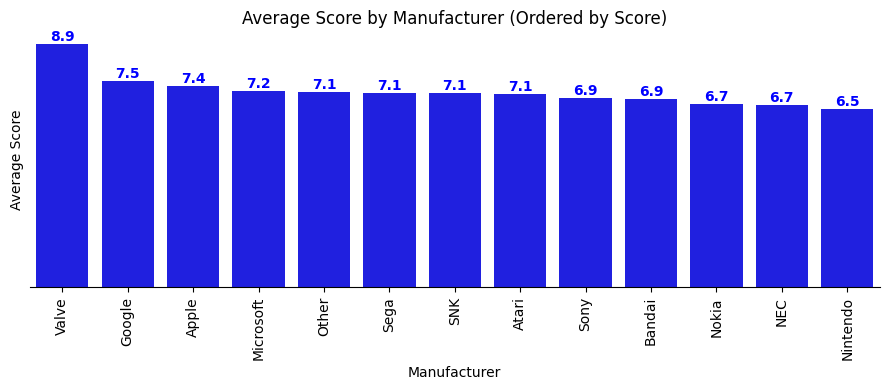

In [12]:
# @title 2.3 Bar Chart - Score by Manufacturer
# Order by score
manufacturer_analysis_sorted = manufacturer_analysis.sort_values(by='score', ascending=False)

# Plotting
plt.figure(figsize=(9, 4))
ax = sns.barplot(x='manufacturer', y='score', data=manufacturer_analysis_sorted, color='blue')
plt.xticks(rotation=90)
plt.title('Average Score by Manufacturer (Ordered by Score)')
plt.xlabel('Manufacturer')
plt.ylabel('Average Score')

# Add score numbers on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', color='blue',  weight='bold')

# Visual details
ax.set_yticks([]) # Hide y-axis labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

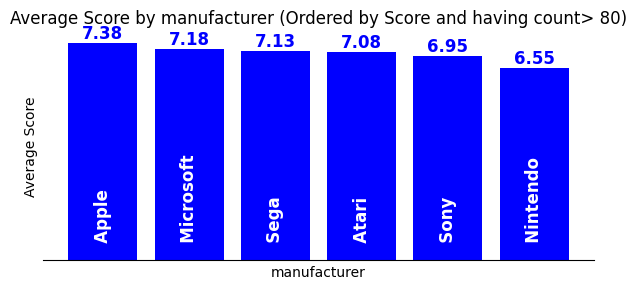

In [13]:
# @title 2.4 Bar Chart - Score by Manufacturer Filtered
# Filter by count
manufacturer_analysis_filtered = manufacturer_analysis[manufacturer_analysis['count'] > 80]
manufacturer_analysis_filtered = manufacturer_analysis_filtered[manufacturer_analysis_filtered['manufacturer'] != 'Other']
manufacturer_analysis_filtered

# Order by score
manufacturer_analysis_sorted = manufacturer_analysis_filtered.sort_values(by='score', ascending=False)

# Plotting with matplotlib only
plt.figure(figsize=(6, 3))
ax = plt.bar(manufacturer_analysis_sorted['manufacturer'], manufacturer_analysis_sorted['score'], color='blue')

plt.title('Average Score by manufacturer (Ordered by Score and having count> 80)')
plt.xlabel('manufacturer')
plt.ylabel('Average Score')
plt.xticks(rotation=90)

# Add score numbers on top of bars and manufacturer names inside bars at the base
for i, (manufacturer, score) in enumerate(zip(manufacturer_analysis_sorted['manufacturer'], manufacturer_analysis_sorted['score'])):
    # Add score numbers on top of bars
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom', color='blue', weight='bold', fontsize=12)
    # Add manufacturer names inside bars at the base
    plt.text(i, 0, "   "+manufacturer, ha='center', va='bottom', color='white',  weight='bold', rotation=90, fontsize=12)

# Visual details
ax = plt.gca() # Get the current axes
ax.set_yticks([]) # Hide y-axis labels
ax.set_xticks([]) # Hide y-axis labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

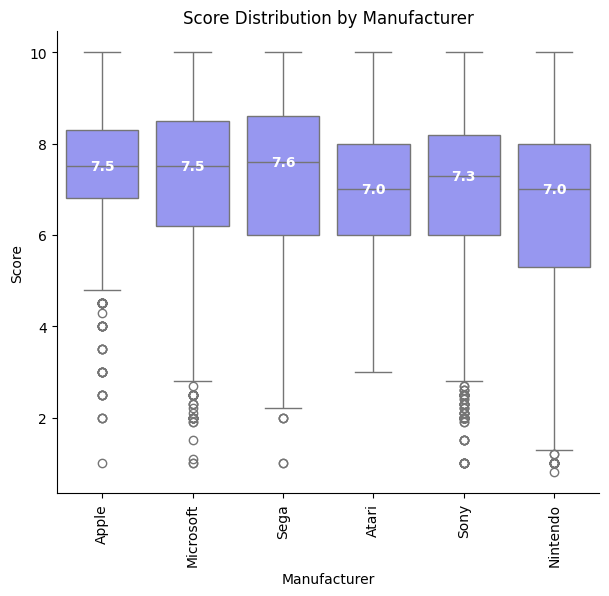

In [14]:
# @title 2.5 Boxplot for Manufacturer
# Generate a boxplot for 'manufacturer' using 'score'
plt.figure(figsize=(7, 6)) # Increased figure height to better accommodate min/max labels

# Calculate the average score for each manufacturer and order them by average score
manufacturer_order = df[df['manufacturer'].isin(manufacturer_analysis_filtered['manufacturer'])].groupby('manufacturer')['score'].mean().sort_values(ascending=False).index

ax = sns.boxplot(x='manufacturer', y='score', data=df[df['manufacturer'].isin(manufacturer_analysis_filtered['manufacturer'])], color='#8888FF', order=manufacturer_order)
plt.title('Score Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Score')
plt.xticks(rotation=90)


# Add median labels to the boxplot
medians = df[df['manufacturer'].isin(manufacturer_analysis_filtered['manufacturer'])].groupby(['manufacturer'])['score'].median().reindex(manufacturer_order)
for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.1f}', ha='center', va='center', color='white', weight='bold')


# Make the square around the chart invisible
ax = plt.gca() # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# 3) What is the average score by **Genre**?

In [15]:
# @title 3.1 Creating Dummies for "Genre" column
# Delete spaces from column genre
df['genre'] = df['genre'].str.replace(' ', '')

# create dummy variables for the 'genre' column, handling null values and splitting by comma
genre_dummies = df['genre'].str.get_dummies(sep=',')

# join the dummy variables to the original dataframe
df = df.join(genre_dummies)

pd.set_option('display.max_columns', None)
df.head()

id score_phrase                                              title  \
0   0      Amazing                            LittleBigPlanet PS Vita   
1   1      Amazing  LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2   2        Great                               Splice: Tree of Life   
3   3        Great                                             NHL 13   
4   4        Great                                             NHL 13   

                                                 url          platform  score  \
0             /games/littlebigplanet-vita/vita-98907  PlayStation Vita    9.0   
1  /games/littlebigplanet-ps-vita-marvel-super-he...  PlayStation Vita    9.0   
2                          /games/splice/ipad-141070              iPad    8.5   
3                      /games/nhl-13/xbox-360-128182          Xbox 360    8.5   
4                           /games/nhl-13/ps3-128181     PlayStation 3    8.5   

        genre editors_choice  release_year  release_month  release_day  \
0  Platformer              Y          2012              9           12   
1  Platformer              Y          2012              9           12   
2      Puzzle              N          2012              9           12   
3      Sports              N          2012              9           11   
4      Sports              N          2012              9           11   

  manufacturer  Action  Adult  Adventure  Baseball  Battle  Board  Card  \
0         Sony       0      0          0         0       0      0     0   
1         Sony       0      0          0         0       0      0     0   
2        Apple       0      0          0         0       0      0     0   
3    Microsoft       0      0          0         0       0      0     0   
4         Sony       0      0          0         0       0      0     0   

   Casino  Compilation  Editor  Educational  Episodic  Fighting  First-Person  \
0       0            0       0            0         0         0             0   
1       0            0       0            0         0         0             0   
2       0            0       0            0         0         0             0   
3       0            0       0            0         0         0             0   
4       0            0       0            0         0         0             0   

   Flight  Golf  Hardware  Hunting  Music  Other  Party  Pinball  Platformer  \
0       0     0         0        0      0      0      0        0           1   
1       0     0         0        0      0      0      0        0           1   
2       0     0         0        0      0      0      0        0           0   
3       0     0         0        0      0      0      0        0           0   
4       0     0         0        0      0      0      0        0           0   

   Productivity  Puzzle  RPG  Racing  Shooter  Simulation  Sports  Strategy  \
0             0       0    0       0        0           0       0         0   
1             0       0    0       0        0           0       0         0   
2             0       1    0       0        0           0       0         0   
3             0       0    0       0        0           0       1         0   
4             0       0    0       0        0           0       1         0   

   Trivia  VirtualPet  WordGame  Wrestling  
0       0           0         0          0  
1       0           0         0          0  
2       0           0         0          0  
3       0           0         0          0  
4       0           0         0          0

In [16]:
# @title 3.2 Score by Genre Table
# Select only the genre dummy columns and the 'score' column
genre_columns = genre_dummies.columns

# Calculate the sum of scores for each genre by multiplying the dummy genre columns by the 'score' column
score_sum_by_genre = df[genre_columns].multiply(df['score'], axis=0).sum(axis=0)

# Calculate the count of games in each genre
genre_counts = df[genre_columns].sum(axis=0)

# Calculate the average score for each genre by dividing the sum of scores by the count
average_scores = score_sum_by_genre / genre_counts


# Convert the average_scores Series to a DataFrame
average_scores_df = average_scores.reset_index()
average_scores_df.columns = ['genre', 'average_score']

# Convert the genre_counts Series to a DataFrame
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['genre', 'count']

# Merge the two DataFrames on the 'genre' column
genre_analysis = pd.merge(average_scores_df, genre_counts_df, on='genre')

# Display the combined DataFrame
genre_analysis.style.bar(subset=['average_score'], color='#BBEEBB', props='border: 1px solid white;')

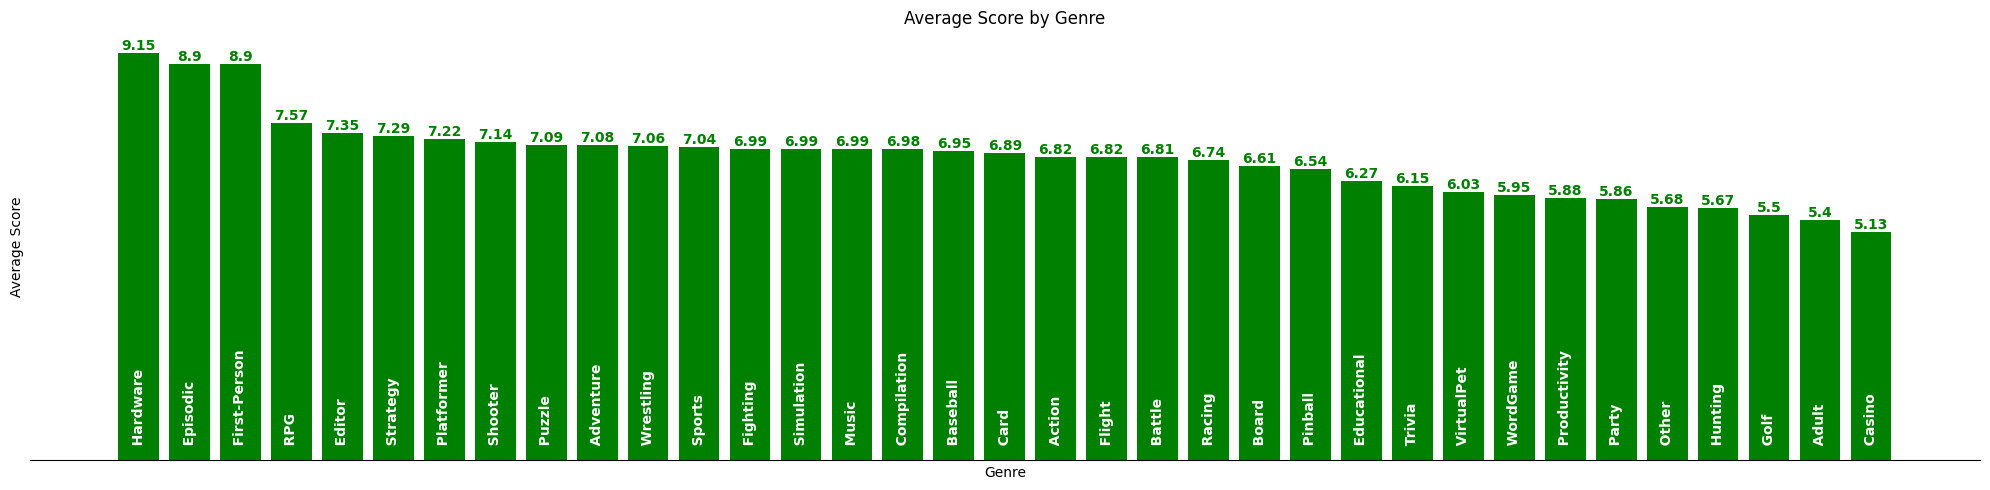

In [17]:
# @title 3.3 Bar Chart - Score by Genre
sorted_average_scores = average_scores.sort_values(ascending=False).round(2)

fig, ax = plt.subplots(figsize=(20, 5)) # Create figure and axes
bars = ax.bar(sorted_average_scores.index, sorted_average_scores.values, color='green')
ax.set_xlabel('Genre')
ax.set_ylabel('Average Score')
ax.set_title('Average Score by Genre')

ax.set_xticks([]) # Hide x-axis labels
ax.set_yticks([]) # Hide y-axis labels
ax.spines['top'].set_visible(False) # Hide the top spine
ax.spines['right'].set_visible(False) # Hide the right spine
ax.spines['left'].set_visible(False) # Hide the left spine


# Add numbers on top of the bars and rotated genre names inside the bars
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x()
    width = bar.get_width()
    genre_name = sorted_average_scores.index[list(bars).index(bar)]
    # Add number on top
    ax.text(xval + width/2., yval, round(yval, 2), ha='center', va='bottom', color='green', weight='bold')
    # Add rotated genre name inside, starting from the base and in bold
    ax.text(xval + width/2., 0, "   "+genre_name, ha='center', va='bottom', rotation=90, color='white', weight='bold')
plt.tight_layout()
plt.show()

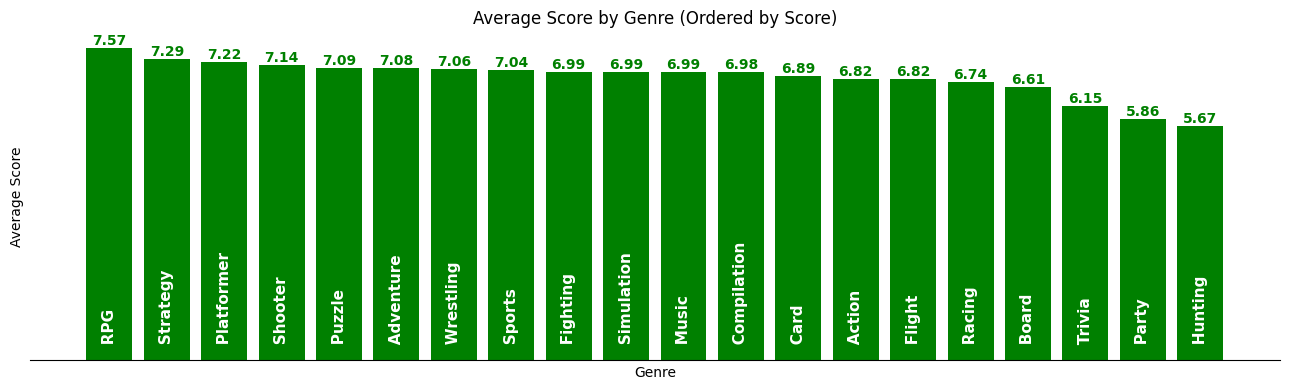

In [18]:
# @title 3.4 Bar Chart - Score by Genre Filtered
genre_analysis_filtered = genre_analysis[genre_analysis['count'] > 100]
genre_analysis_filtered

# Order by score
genre_analysis_sorted = genre_analysis_filtered.sort_values(by='average_score', ascending=False)

# Plotting with matplotlib only
plt.figure(figsize=(13, 4))
ax = plt.bar(genre_analysis_sorted['genre'], genre_analysis_sorted['average_score'], color='#008000')

plt.title('Average Score by Genre (Ordered by Score)')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=90)

# Add average_score numbers on top of bars and genre names inside bars at the base
for i, (genre, average_score) in enumerate(zip(genre_analysis_sorted['genre'], genre_analysis_sorted['average_score'])):
    # Add average_score numbers on top of bars
    plt.text(i, average_score, f'{average_score:.2f}', ha='center', va='bottom', color='#008000', weight='bold')
    # Add genre names inside bars at the base
    plt.text(i, 0, "   "+genre, ha='center', va='bottom', color='white',  weight='bold', rotation=90, fontsize=11)

# Make the square around the chart invisible
ax = plt.gca() # Get the current axes
ax.set_yticks([]) # Hide y-axis labels
ax.set_xticks([]) # Hide y-axis labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.tight_layout()
plt.show()


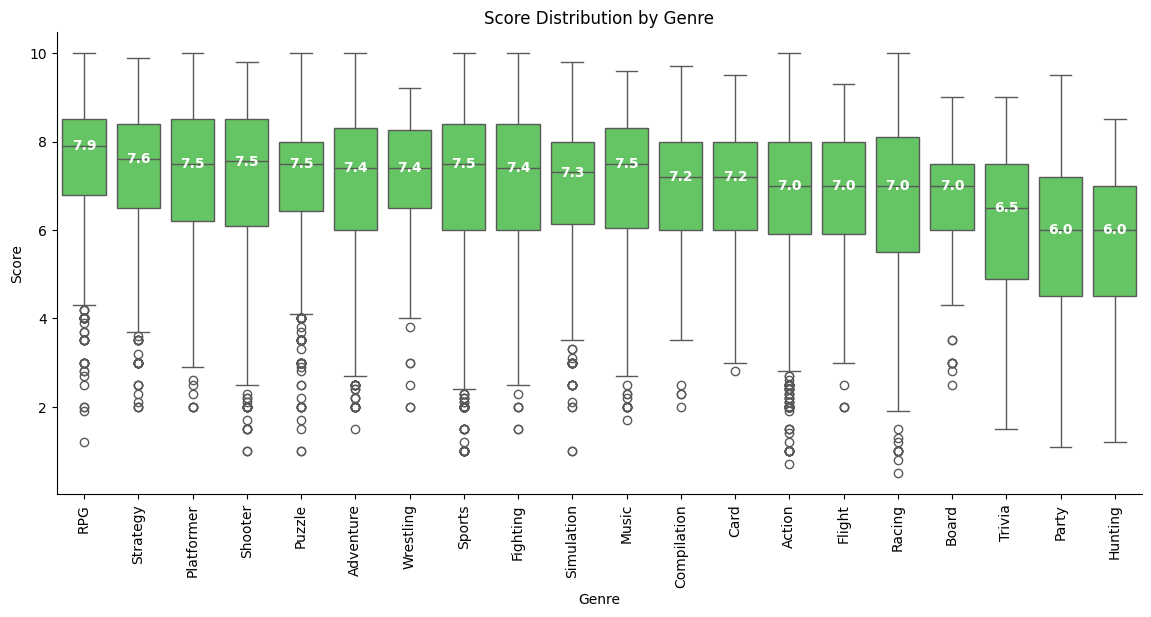

In [19]:
# @title 3.5 Boxplot for Genre
# Generate a boxplot for 'genre' using 'score'
plt.figure(figsize=(14, 6)) # Increased figure height to better accommodate min/max labels

# Calculate the average score for each genre and order them by average score
genre_order = genre_analysis_filtered.groupby('genre')['average_score'].mean().sort_values(ascending=False).index

# Unpivot the genre dummy columns to a long format
df_genres_long = df.melt(id_vars=['score'], value_vars=genre_dummies.columns, var_name='genre', value_name='is_genre')
df_genres_long = df_genres_long[df_genres_long['is_genre'] == 1]


ax = sns.boxplot(x='genre', y='score', data=df_genres_long[df_genres_long['genre'].isin(genre_analysis_filtered['genre'])], color='#55D555', order=genre_order)
plt.title('Score Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.xticks(rotation=90)


# Add median labels to the boxplot
medians = df_genres_long[df_genres_long['genre'].isin(genre_analysis_filtered['genre'])].groupby(['genre'])['score'].median().reindex(genre_order)
for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.1f}', ha='center', va='center', color='white', weight='bold')


# Make the square around the chart invisible
ax = plt.gca() # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# 4) What's the main difference for games that are **editors choice**?

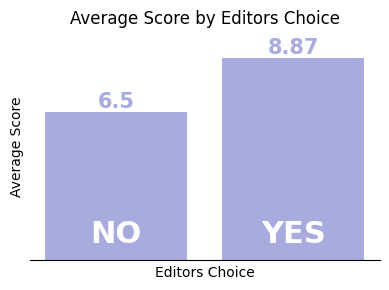

In [20]:
# @title 4.1 Bar Chart - Score by Ed.Choice
# Group by 'editors_choice' and calculate the average score
avg_score_by_editors_choice = df.groupby('editors_choice')['score'].mean().reset_index().round(2)

# Create a bar chart for average score by editors choice
plt.figure(figsize=(4, 3)) # Adjusted figure height slightly to better accommodate labels inside
ax = plt.bar(avg_score_by_editors_choice['editors_choice'], avg_score_by_editors_choice['score'], color='#A7ABDE') # Use light purple color

plt.title('Average Score by Editors Choice')
plt.xlabel('Editors Choice')
plt.ylabel('Average Score')
plt.ylim(0, 10) # Set y-axis limit to match score range

# Add average score values on top of the bars and labels inside the bars
for i, bar in enumerate(ax):
    yval = bar.get_height()
    xval = bar.get_x()
    width = bar.get_width()
    # Add average score on top
    plt.text(xval + width/2, yval, round(yval, 2), ha='center', va='bottom', color='#A7ABDE', weight='bold', fontsize=15)

    # Add label inside the bar
    label = avg_score_by_editors_choice['editors_choice'].iloc[i]
    display_label = 'NO' if label == 'N' else 'YES'
    plt.text(xval + width/2, 0.5, display_label, ha='center', va='bottom', color='white', weight='bold', fontsize=22) # Position label near the bottom

# Make the square around the chart invisible
ax = plt.gca() # Get the current axes
ax.set_yticks([]) # Hide y-axis labels
ax.set_xticks([]) # Hide y-axis labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.tight_layout()
plt.show()

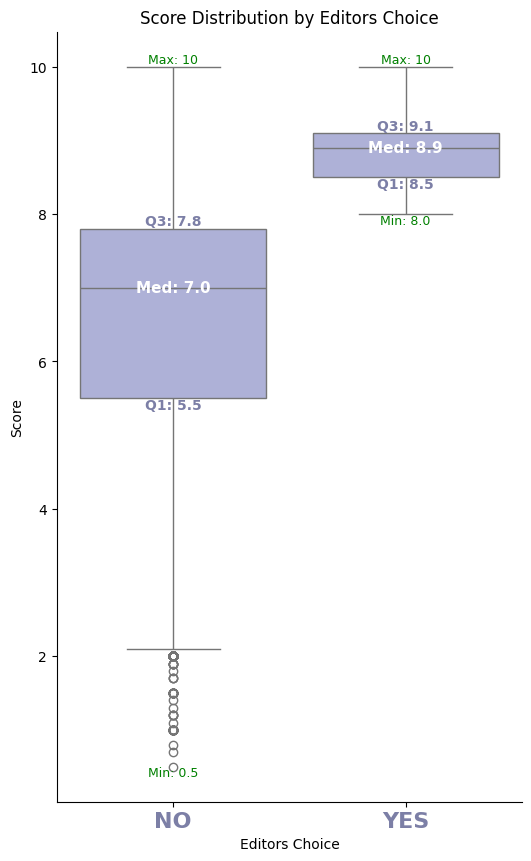

In [21]:
# @title 4.2 Boxplot for Ed.Choice
# Generate a boxplot for 'editors_choice' using 'score'
plt.figure(figsize=(6, 10)) # Increased figure height to better accommodate min/max labels
# Set the order of the boxes to 'N' then 'Y'
ax = sns.boxplot(x='editors_choice', y='score', data=df, color='#A7ABDE', order=['N', 'Y'])
plt.title('Score Distribution by Editors Choice')
plt.xlabel('Editors Choice')
plt.ylabel('Score')
# Set the x-axis labels to match the new order
plt.xticks([0, 1], ['NO', 'YES'], size='16', color='#7c7fa6', weight='bold' )

# Make the square around the chart invisible
ax = plt.gca() # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Calculate quartiles, average, min, and max for each editors_choice group
quartiles_and_stats = df.groupby('editors_choice')['score'].agg(['min', 'max', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), 'mean']).reset_index()
quartiles_and_stats.columns = ['editors_choice', 'min', 'max', 'median', 'q1', 'q3', 'mean']


# Add quartile, median, min, and max values to the boxplot
# Iterate in the order of the boxplot ('N' then 'Y')
for i, choice in enumerate(['N', 'Y']):
    row = quartiles_and_stats[quartiles_and_stats['editors_choice'] == choice].iloc[0]
    min_score = row['min']
    max_score = row['max']
    median_score = row['median']
    q1_score = row['q1']
    q3_score = row['q3']

    # Add median
    ax.text(i, median_score, f'Med: {median_score:.1f}', ha='center', va='center', color='white', fontsize=11, weight='bold')

    # Add Q1 (positioned at q1_score)
    ax.text(i, q1_score, f'Q1: {q1_score:.1f}', ha='center', va='top', color='#7c7fa6', fontsize=10, weight='bold')

    # Add Q3 (positioned at q3_score)
    ax.text(i, q3_score, f'Q3: {q3_score:.1f}', ha='center', va='bottom', color='#7c7fa6', fontsize=10, weight='bold')

    # Add Min (positioned below the lower whisker)
    ax.text(i, min_score, f'Min: {min_score:.1f}', ha='center', va='top', color='green', fontsize=9)

    # Add Max (positioned above the upper whisker)
    ax.text(i, max_score, f'Max: {max_score:.0f}', ha='center', va='bottom', color='green', fontsize=9)


plt.show()

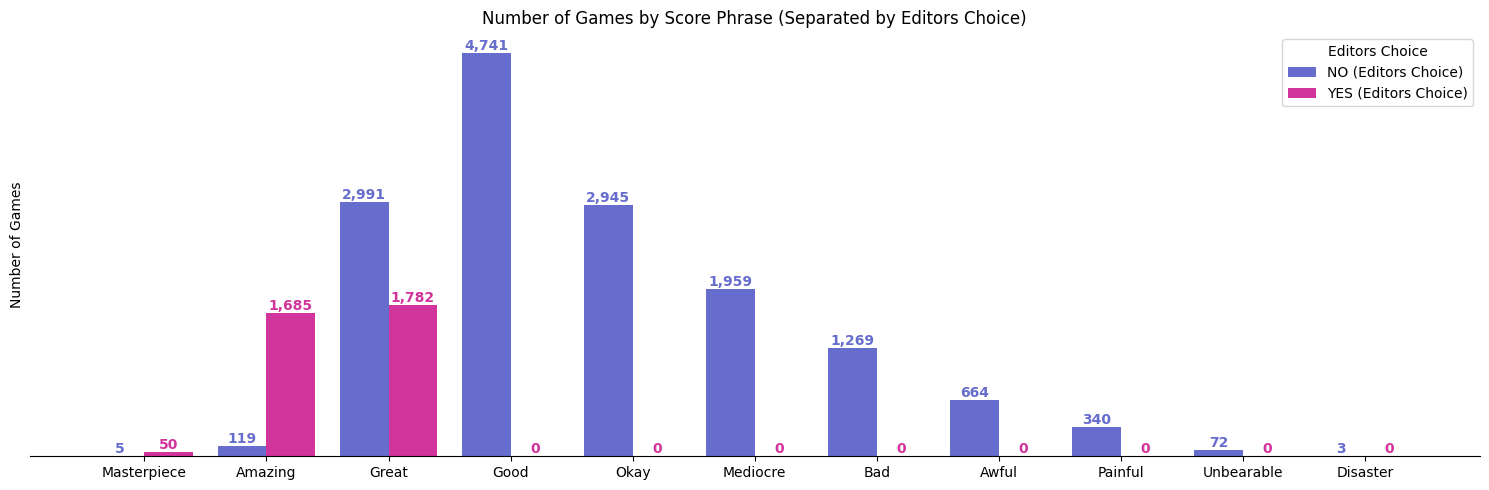

In [22]:
# @title 4.3 Bar chart for Score Phase
score_phrase_by_editors_choice = df.groupby(['editors_choice', 'score_phrase']).size().unstack(fill_value=0)


# Define the desired order of score phrases (reusing from cell CVBUZvSrr8l5)
score_phrase_order = ['Masterpiece', 'Amazing', 'Great', 'Good', 'Okay', 'Mediocre', 'Bad', 'Awful', 'Painful', 'Unbearable', 'Disaster']

# Filter the score_phrase_by_editors_choice DataFrame for 'editors_choice' = 'N' and 'Y'
score_phrase_counts_N = score_phrase_by_editors_choice.loc['N']
score_phrase_counts_Y = score_phrase_by_editors_choice.loc['Y']

# Convert the filtered Series to DataFrames and rename columns
score_phrase_counts_N_df = score_phrase_counts_N.reset_index()
score_phrase_counts_N_df.columns = ['score_phrase', 'count']
score_phrase_counts_Y_df = score_phrase_counts_Y.reset_index()
score_phrase_counts_Y_df.columns = ['score_phrase', 'count']

# Reindex the DataFrames to match the desired order
score_phrase_counts_N_ordered = score_phrase_counts_N_df.set_index('score_phrase').reindex(score_phrase_order).reset_index()
score_phrase_counts_Y_ordered = score_phrase_counts_Y_df.set_index('score_phrase').reindex(score_phrase_order).reset_index()

# Create a figure and axes
plt.figure(figsize=(15, 5)) # Increased figure width for side-by-side bars
ax = plt.gca()

bar_width = 0.40 # Width of each bar
x_positions = np.arange(len(score_phrase_order)) # Base x-positions for each score phrase

# Plot the bar chart for 'N' (shifted to the left) and store the bar objects
bars_N = ax.bar(x_positions - bar_width/2, score_phrase_counts_N_ordered['count'], bar_width, color='#666dcc', label='NO (Editors Choice)')

# Plot the bar chart for 'Y' (shifted to the right) and store the bar objects
bars_Y = ax.bar(x_positions + bar_width/2, score_phrase_counts_Y_ordered['count'], bar_width, color='#d1349a', label='YES (Editors Choice)')


plt.title('Number of Games by Score Phrase (Separated by Editors Choice)')
#plt.xlabel('Score Phrase')
plt.ylabel('Number of Games')
plt.xticks(x_positions, score_phrase_order, rotation=0, ha='center') # Set x-ticks at the center of the grouped bars
plt.legend(title='Editors Choice')

# Add count numbers on top of the 'N' bars with comma formatting
for bar in bars_N:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom', weight='bold', color='#666dcc') # Use f-string with comma

# Add count numbers on top of the 'Y' bars with comma formatting
for bar in bars_Y:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom', weight='bold', color='#d1349a') # Use f-string with comma


# Make the square around the chart invisible
ax = plt.gca() # Get the current axes
ax.set_yticks([]) # Hide y-axis labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.tight_layout()
plt.show()

# 5) What can we learn from the main features **over time** ?

In [23]:
# @title 5.1 Create Release Date

# Create a new column called "release_date"
# Temporarily rename columns for pd.to_datetime
temp_df = df[['release_year', 'release_month', 'release_day']].copy()
temp_df.columns = ['year', 'month', 'day']
df['release_date'] = pd.to_datetime(temp_df)

# Group by release_date and count the number of games
games_by_date = df.groupby('release_date').size().reset_index(name='game_count')

# Order the DataFrame by release_date
df_ordered_by_date = df.sort_values(by='release_date')

# Display the ordered DataFrame
display(df_ordered_by_date.head()) # Displaying head for brevity

id score_phrase                            title  \
515  515         Good                        Baku Baku   
514  514      Amazing                   Super Mario 64   
488  488        Great                    Pilotwings 64   
487  487     Mediocre  Batman Forever: The Arcade Game   
486  486          Bad                      Cruis'n USA   

                               url     platform  score       genre  \
515    /games/baku-baku/saturn-194       Saturn    7.0      Puzzle   
514  /games/super-mario-64/n64-606  Nintendo 64    9.8  Platformer   
488    /games/pilotwings-64/n64-83  Nintendo 64    8.2      Flight   
487   /games/batman-forever/ps-318  PlayStation    5.0      Action   
486      /games/cruisn-usa/n64-498  Nintendo 64    4.0      Racing   

    editors_choice  release_year  release_month  release_day manufacturer  \
515              N          1996              6           18         Sega   
514              Y          1996              9           25     Nintendo   
488              N          1996              9           25     Nintendo   
487              N          1996             11            2         Sony   
486              N          1996             11           14     Nintendo   

     Action  Adult  Adventure  Baseball  Battle  Board  Card  Casino  \
515       0      0          0         0       0      0     0       0   
514       0      0          0         0       0      0     0       0   
488       0      0          0         0       0      0     0       0   
487       1      0          0         0       0      0     0       0   
486       0      0          0         0       0      0     0       0   

     Compilation  Editor  Educational  Episodic  Fighting  First-Person  \
515            0       0            0         0         0             0   
514            0       0            0         0         0             0   
488            0       0            0         0         0             0   
487            0       0            0         0         0             0   
486            0       0            0         0         0             0   

     Flight  Golf  Hardware  Hunting  Music  Other  Party  Pinball  \
515       0     0         0        0      0      0      0        0   
514       0     0         0        0      0      0      0        0   
488       1     0         0        0      0      0      0        0   
487       0     0         0        0      0      0      0        0   
486       0     0         0        0      0      0      0        0   

     Platformer  Productivity  Puzzle  RPG  Racing  Shooter  Simulation  \
515           0             0       1    0       0        0           0   
514           1             0       0    0       0        0           0   
488           0             0       0    0       0        0           0   
487           0             0       0    0       0        0           0   
486           0             0       0    0       1        0           0   

     Sports  Strategy  Trivia  VirtualPet  WordGame  Wrestling release_date  
515       0         0       0           0         0          0   1996-06-18  
514       0         0       0           0         0          0   1996-09-25  
488       0         0       0           0         0          0   1996-09-25  
487       0         0       0           0         0          0   1996-11-02  
486       0         0       0           0         0          0   1996-11-14

In [24]:
# @title 5.2 Chart of Release by day
# Create an interactive trendline chart with Plotly Express
fig = px.line(games_by_date, x='release_date', y='game_count',
              title='Number of Games Released per Day (Interactive)')

fig.update_xaxes(dtick="M12")

# Display the interactive plot
fig.show()

## 5.3 Patform Evolution

In [25]:
# @title 5.3.1 Trendline of Games by Platform - Month
# Group by platform and then resample the release_date to monthly frequency, summing the game counts
# Use 'on' parameter to specify the datetime column for resampling
games_by_month_platform = df.groupby('platform').resample('ME', on='release_date').size().reset_index(name='game_count')

# Get platforms with a total count greater than 100 (reusing platform_analysis)
platforms_to_keep = platform_analysis[platform_analysis['count'] > 100]['platform'].tolist()

# Filter the monthly game counts to include only the platforms to keep
games_by_month_platform_filtered = games_by_month_platform[games_by_month_platform['platform'].isin(platforms_to_keep)]


# Create an interactive trendline chart broken down by platform, using filtered monthly counts
fig = px.line(games_by_month_platform_filtered, x='release_date', y='game_count', color='platform',
              title='Number of Games Released per Month by Platform (Interactive, Count > 100)')

fig.update_xaxes(dtick="M12")

# Display the interactive plot
fig.show()

In [26]:
# @title 5.3.2 Trendline of Games by Platform - Year
# Group by platform and then resample the release_date to yearly frequency, summing the game counts
# Use 'on' parameter to specify the datetime column for resampling
games_by_year_platform = df.groupby('platform').resample('YE', on='release_date').size().reset_index(name='game_count')

# Get platforms with a total count greater than 100 (reusing platform_analysis)
platforms_to_keep = platform_analysis[platform_analysis['count'] > 100]['platform'].tolist()

# Filter the yearly game counts to include only the platforms to keep
games_by_year_platform_filtered = games_by_year_platform[games_by_year_platform['platform'].isin(platforms_to_keep)]

# Create an interactive trendline chart broken down by platform, using filtered yearly counts
fig = px.line(games_by_year_platform_filtered, x='release_date', y='game_count', color='platform',
              title='Number of Games Released per Year by Platform (Interactive, Count > 100)')

fig.update_xaxes(dtick="M12")
fig.update_traces(line=dict(width=4))

# Display the interactive plot
fig.show()

## 5.4 Manufacturer Evolution

In [27]:
# @title 5.4.1 Trendline of Games by Manufacturer - Month
# Group by manufacturer and then resample the release_date to monthly frequency, summing the game counts
# Use 'on' parameter to specify the datetime column for resampling
games_by_month_manufacturer = df.groupby('manufacturer').resample('ME', on='release_date').size().reset_index(name='game_count')

# Get manufacturers with a total count greater than 80 (reusing manufacturer_analysis)
manufacturers_to_keep = manufacturer_analysis[manufacturer_analysis['count'] > 80]['manufacturer'].tolist()

# Filter the monthly game counts to include only the manufacturers to keep
games_by_month_manufacturer_filtered = games_by_month_manufacturer[games_by_month_manufacturer['manufacturer'].isin(manufacturers_to_keep)]

# Create an interactive trendline chart broken down by manufacturer, using filtered monthly counts
fig = px.line(games_by_month_manufacturer_filtered, x='release_date', y='game_count', color='manufacturer',
              title='Number of Games Released per Month by Manufacturer (Interactive, Count > 80)')


fig.update_xaxes(dtick="M12")

# Display the interactive plot
fig.show()

In [28]:
# @title 5.4.2 Trendline of Games by Manufacturer - Year
# Group by manufacturer and then resample the release_date to yearly frequency, summing the game counts
# Use 'on' parameter to specify the datetime column for resampling
games_by_year_manufacturer = df.groupby('manufacturer').resample('YE', on='release_date').size().reset_index(name='game_count')

# Get manufacturers with a total count greater than 80 (reusing manufacturer_analysis)
manufacturers_to_keep = manufacturer_analysis[manufacturer_analysis['count'] > 80]['manufacturer'].tolist()

# Filter the yearly game counts to include only the manufacturers to keep
games_by_year_manufacturer_filtered = games_by_year_manufacturer[games_by_year_manufacturer['manufacturer'].isin(manufacturers_to_keep)]

# Create an interactive trendline chart broken down by manufacturer, using filtered yearly counts
fig = px.line(games_by_year_manufacturer_filtered, x='release_date', y='game_count', color='manufacturer',
              title='Number of Games Released per Year by Manufacturer (Interactive, Count > 80)')

fig.update_xaxes(dtick="M12")
fig.update_traces(line=dict(width=4))

# Display the interactive plot
fig.show()

## 5.5 Genre Evolution

In [29]:
# @title 5.5.1 Trendline of Games by Genre - Month
# Select release_date and the genre dummy columns
df_genres_time = df[['release_date'] + list(genre_dummies.columns)].copy()

# Melt the DataFrame to a long format
df_genres_time_melted = df_genres_time.melt(id_vars=['release_date'],
                                            var_name='genre',
                                            value_name='is_genre')

# Filter out rows where the game does not belong to the genre (is_genre == 0)
df_genres_time_filtered = df_genres_time_melted[df_genres_time_melted['is_genre'] == 1].drop('is_genre', axis=1)

# Group by genre and then resample the release_date to monthly frequency, summing the game counts
# Use 'on' parameter to specify the datetime column for resampling
games_by_month_genre = df_genres_time_filtered.groupby('genre').resample('ME', on='release_date').size().reset_index(name='game_count')


# Get genres with a total count greater than 100 (reusing genre_analysis)
genres_to_keep = genre_analysis[genre_analysis['count'] > 100]['genre'].tolist()

# Filter the monthly game counts to include only the genres to keep
games_by_month_genre_filtered = games_by_month_genre[games_by_month_genre['genre'].isin(genres_to_keep)]


# Create an interactive trendline chart broken down by genre, using filtered monthly counts
fig = px.line(games_by_month_genre_filtered, x='release_date', y='game_count', color='genre',
              title='Number of Games Released per Month by Genre (Interactive, Count > 100)')

fig.update_xaxes(dtick="M12")

# Display the interactive plot
fig.show()

In [30]:
# @title 5.5.2 Trendline of Games by Genre - Year
# Use 'on' parameter to specify the datetime column for resampling
games_by_year_genre = df_genres_time_filtered.groupby('genre').resample('YE', on='release_date').size().reset_index(name='game_count')


# Get genres with a total count greater than 100 (reusing genre_analysis)
genres_to_keep = genre_analysis[genre_analysis['count'] > 100]['genre'].tolist()

# Filter the yearly game counts to include only the genres to keep
games_by_year_genre_filtered = games_by_year_genre[games_by_year_genre['genre'].isin(genres_to_keep)]


# Create an interactive trendline chart broken down by genre, using filtered yearly counts
fig = px.line(games_by_year_genre_filtered, x='release_date', y='game_count', color='genre',
              title='Number of Games Released per year by Genre (Interactive, Count > 100)')

fig.update_xaxes(dtick="M12")
fig.update_traces(line=dict(width=4))

# Display the interactive plot
fig.show()

## 5.6 Game Quality Evolution

In [31]:
# @title 5.6.1 Trendline of Game Score
# Group by release_date and calculate the average score per day
average_score_by_date = df.groupby('release_date')['score'].mean().reset_index()

# Resample the daily average scores to monthly frequency and calculate the mean
average_score_by_month = average_score_by_date.set_index('release_date').resample('ME').mean().reset_index().dropna()

# Create an interactive line chart for average score by month using Plotly Express
fig = px.line(average_score_by_month, x='release_date', y='score',
              title='Average Game Score by Release Month (Interactive)')

# Add OLS trendline
X = sm.add_constant(average_score_by_month.index)
model = sm.OLS(average_score_by_month['score'], X)
results = model.fit()
fig.add_scatter(x=average_score_by_month['release_date'], y=results.predict(X), mode='lines', line=dict(dash='dash', width=2), name='Trendline')

# Add regression equation as annotation
equation = f'y = {results.params.iloc[1]:.3f}x + {results.params.iloc[0]:.3f}'
fig.add_annotation(x=average_score_by_month['release_date'].iloc[150], y=8, text=equation, showarrow=False, font=dict(color='red', weight='bold'))


fig.data[0].line.width = 4
fig.update_xaxes(dtick="M12")

# Display the interactive plot
fig.show()

In [32]:
# @title 5.6.2 Trendline of Score by Score Phase
# Group by score_phrase and then resample the release_date to yearly frequency, summing the game counts
# Use 'on' parameter to specify the datetime column for resampling
games_by_year_score_phrase = df.groupby('score_phrase').resample('YE', on='release_date').size().reset_index(name='game_count')

color_sequence = ['#FF0000', '#FF4500', '#FF8C00', '#FFD700', '#EEEE00', '#ADFF2F', '#00FF00', '#00FA9A', '#00CED1', '#00BFFF', '#1E90FF']


# Create an interactive trendline chart broken down by score_phrase, using yearly counts
fig = px.line(games_by_year_score_phrase, x='release_date', y='game_count', color='score_phrase',
              title='Number of Games Released per Year by Score Phrase (Interactive)',
              color_discrete_sequence=color_sequence,
              template='plotly_white')

fig.update_traces(line=dict(width=4))
fig.update_xaxes(dtick="M12")

# Display the interactive plot
fig.show()

In [33]:
# @title 5.6.3 Stacked Bar for Score Phase - Values
# Group by score_phrase and then resample the release_date to yearly frequency, summing the game counts
# Use 'on' parameter to specify the datetime column for resampling
games_by_year_score_phrase = df.groupby('score_phrase').resample('YE', on='release_date').size().reset_index(name='game_count')

# Define the desired order of score phrases
score_phrase_order = ['Masterpiece', 'Amazing', 'Great', 'Good', 'Okay', 'Mediocre', 'Bad', 'Awful', 'Painful', 'Unbearable', 'Disaster']

# Reverse the order for stacking
score_phrase_order.reverse()

# Define a custom color sequence from warm to cold
color_sequence = ['#FF0000', '#FF4500', '#FF8C00', '#FFD700', '#FFFF00', '#ADFF2F', '#00FF00', '#00FA9A', '#00CED1', '#00BFFF', '#1E90FF']

# Invert the color sequence
color_sequence.reverse()

# Create an interactive stacked bar chart broken down by score_phrase, using yearly counts
fig = px.bar(games_by_year_score_phrase, x='release_date', y='game_count', color='score_phrase',
              title='Number of Games Released per Year by Score Phrase (Interactive)',
              barmode='stack',
              category_orders={'score_phrase': score_phrase_order},
              color_discrete_sequence=color_sequence)

fig.update_xaxes(dtick="M12")

# Display the interactive plot
fig.show()

In [34]:
# @title 5.6.4 Stacked Bar for Score Phase - Perentage
# Group by score_phrase and then resample the release_date to yearly frequency, summing the game counts
# Use 'on' parameter to specify the datetime column for resampling
games_by_year_score_phrase = df.groupby('score_phrase').resample('YE', on='release_date').size().reset_index(name='game_count')

# Calculate the total number of games for each year
total_games_per_year = games_by_year_score_phrase.groupby('release_date')['game_count'].sum().reset_index()
total_games_per_year.rename(columns={'game_count': 'total_games'}, inplace=True)

# Merge the total counts back to the original dataframe
games_by_year_score_phrase = pd.merge(games_by_year_score_phrase, total_games_per_year, on='release_date')

# Calculate the percentage
games_by_year_score_phrase['percentage'] = (games_by_year_score_phrase['game_count'] / games_by_year_score_phrase['total_games']) * 100

# Define the desired order of score phrases
score_phrase_order = ['Masterpiece', 'Amazing', 'Great', 'Good', 'Okay', 'Mediocre', 'Bad', 'Awful', 'Painful', 'Unbearable', 'Disaster']

# Reverse the order for stacking
score_phrase_order.reverse()

# Define a custom color sequence from warm to cold
color_sequence = ['#FF0000', '#FF4500', '#FF8C00', '#FFD700', '#FFFF00', '#ADFF2F', '#00FF00', '#00FA9A', '#00CED1', '#00BFFF', '#1E90FF']

# Invert the color sequence
color_sequence.reverse()


# Create an interactive stacked bar chart broken down by score_phrase, using yearly counts
fig = px.bar(games_by_year_score_phrase, x='release_date', y='percentage', color='score_phrase',
              title='Number of Games Released per Year by Score Phrase (Interactive)',
              barmode='stack',
              category_orders={'score_phrase': score_phrase_order},
              height=600,
              color_discrete_sequence=color_sequence)

fig.update_xaxes(dtick="M12")

# Display the interactive plot
fig.show()

# 6) How long has each **platform** had games released?

In [35]:
# @title 6.1 Total Days by Platform
# Sort the DataFrame by platform, release_date, and score (descending)
# Sorting by score descending ensures that when we take the first/last entry for a date,
# the game with the highest score on that date is prioritized.
df_sorted = df.sort_values(by=['platform', 'release_date', 'score'], ascending=[True, True, False])

# Group by platform and find the first and last entries
platform_summary = df_sorted.groupby('platform').agg(
    first_release_date=('release_date', 'first'),
    first_game_title=('title', 'first'),
    last_release_date=('release_date', 'last'),
    last_game_title=('title', 'last'),
    count=('title', 'size') # Count games for each platform
).reset_index()

# Calculate the total number of days
platform_summary['total_days'] = (platform_summary['last_release_date'] - platform_summary['first_release_date']).dt.days

# Format the date columns to 'yyyy-mmm-dd'
platform_summary['first_release_date'] = platform_summary['first_release_date'].dt.strftime('%Y-%b-%d')
platform_summary['last_release_date'] = platform_summary['last_release_date'].dt.strftime('%Y-%b-%d')

# Order the table by total_days
platform_summary = platform_summary.sort_values(by='total_days', ascending=False)

# Reorder columns
ordered_columns = ['platform', 'count', 'first_release_date', 'first_game_title', 'last_release_date', 'last_game_title', 'total_days']
platform_analysis_with_counts_display = platform_summary[ordered_columns]


# Rename the columns for better readability
platform_analysis_with_counts_display = platform_analysis_with_counts_display.rename(columns={
    'platform': 'Platform',
    'count': 'Count',
    'first_release_date': '1st Release Date',
    'first_game_title': 'First Game 🌸',
    'last_release_date': 'Last Release Date',
    'last_game_title': 'Last Game 🥀',
    'total_days': 'Total Days'})


# Apply styling
(platform_analysis_with_counts_display.style
 .bar(subset=['Total Days'], color='#f9bdff', props='border: 1px solid white;')
 .format({'Total Days': '{:,}', 'Count': '{:,}'})
 .set_properties(subset=['First Game 🌸', 'Last Game 🥀'], **{'text-align': 'left'})
 .set_properties(subset=['1st Release Date', 'Last Release Date'], **{'font-weight': 'bold'}, color='#b169b8')
 .set_table_styles([
     {'selector': 'th', 'props': [('text-align', 'left')]},
     {'selector': 'th:nth-child(4)', 'props': [('color', '#b169b8')]},
     {'selector': 'th:nth-child(6)', 'props': [('color', '#b169b8')]}
 ]))

In [36]:
# @title 6.2 Total Days by Platform (>100 games)
# Filter by count > 100
platform_analysis_filtered_display = platform_analysis_with_counts_display[platform_analysis_with_counts_display['Count'] > 100]

# Apply styling
(platform_analysis_filtered_display.style
 .bar(subset=['Total Days'], color='#f9bdff', props='border: 1px solid white;')
 .format({'Total Days': '{:,}', 'Count': '{:,}'})
 .set_properties(subset=['First Game 🌸', 'Last Game 🥀'], **{'text-align': 'left'})
 .set_properties(subset=['1st Release Date', 'Last Release Date'], **{'font-weight': 'bold'}, color='#b169b8')
 .set_table_styles([
     {'selector': 'th', 'props': [('text-align', 'left')]},
     {'selector': 'th:nth-child(4)', 'props': [('color', '#b169b8')]},
     {'selector': 'th:nth-child(6)', 'props': [('color', '#b169b8')]}
 ]))

# 7) What time of the year do we have more game launches?

In [37]:
# @title 7.1 Bar chart of release by month
# Calculate the number of games launched per month
games_by_month = df.groupby('release_month').size().reset_index(name='game_count')

# Create a mapping for month numbers to names
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
games_by_month['month_name'] = games_by_month['release_month'].map(month_map)

# Sort by month number to ensure correct order
games_by_month = games_by_month.sort_values('release_month')

# Create an interactive bar chart with Plotly Express
fig = px.bar(games_by_month, x='month_name', y='game_count',
             title='Total Number of Games Launched per Month (Interactive)',
             labels={'month_name': 'Month', 'game_count': 'Number of Games'},
             text=games_by_month['month_name'],
             color_discrete_sequence=['orange'])

fig.update_traces(textposition='inside', insidetextanchor='start', textfont_color='white', textfont_size=14, textfont=dict(family="Arial", size=18, color="white", weight='bold'))
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)

# Add a second trace for the counts on top
fig.add_trace(go.Scatter(
    x=games_by_month['month_name'],
    y=games_by_month['game_count'],
    text=[f'{x:,}' for x in games_by_month['game_count']],
    mode='text',
    textposition='top center',
    textfont=dict(
        color='orange',
        size=14,
        weight='bold'
    ),
    showlegend=False
))


# Display the interactive plot
fig.show()

# 8) What are the 3 best games by **Platform**?

In [38]:
# @title 8.1 Best Games Table
# Filter out platforms with less than 100 games to ensure a meaningful comparison
platform_counts = df['platform'].value_counts()
platforms_with_enough_games = platform_counts[platform_counts > 100].index
df_filtered = df[df['platform'].isin(platforms_with_enough_games)]

# Sort by platform and then by score in descending order
df_sorted = df_filtered.sort_values(by=['platform', 'score'], ascending=[True, False])

# Get the top 3 games for each platform and create a copy to avoid SettingWithCopyWarning
top_3_games_by_platform = df_sorted.groupby('platform').head(3).copy()

# Create a rank column for pivoting
top_3_games_by_platform['rank'] = top_3_games_by_platform.groupby('platform').cumcount() + 1

# Pivot the table to have platforms as rows and top games as columns
top_games_pivot = top_3_games_by_platform.pivot_table(index='platform', columns='rank', values=['title', 'score'], aggfunc='first').reset_index()

# Flatten the multi-level column index
top_games_pivot.columns = [f'{col[0]}_{col[1]}' if col[1] != '' else col[0] for col in top_games_pivot.columns]


# Rename the columns for better readability
top_games_pivot = top_games_pivot.rename(columns={
    'platform': 'Platform',
    'score_1': '1st Score',
    'title_1': '🥇1st Place',
    'score_2': '2nd Score',
    'title_2': '🥈2nd Place',
    'score_3': '3rd Score',
    'title_3': '🥉3rd Place'
})

# Reorder the columns
top_games_pivot = top_games_pivot[['Platform', '🥇1st Place', '1st Score',  '🥈2nd Place', '2nd Score', '🥉3rd Place',  '3rd Score']]


# Display the result
display(top_games_pivot)

Platform                              🥇1st Place  1st Score  \
0              Dreamcast                             Soulcalibur       10.0   
1       Game Boy Advance                            Advance Wars        9.9   
2         Game Boy Color                Super Mario Bros. Deluxe       10.0   
3               GameCube                           Metroid Prime        9.8   
4           Nintendo 3DS                   Fire Emblem Awakening        9.6   
5            Nintendo 64    The Legend of Zelda: Ocarina of Time       10.0   
6            Nintendo DS                 Pokemon White Version 2        9.6   
7           Nintendo DSi                         Flipnote Studio        9.0   
8                     PC                      Grand Theft Auto V       10.0   
9            PlayStation                        Metal Gear Solid        9.8   
10         PlayStation 2           Grand Theft Auto: San Andreas        9.9   
11         PlayStation 3   Grand Theft Auto IV (Special Edition)       10.0   
12         PlayStation 4              The Last of Us: Remastered       10.0   
13  PlayStation Portable           Syphon Filter: Logan's Shadow        9.5   
14      PlayStation Vita       Zero Escape: Virtue's Last Reward        9.5   
15                   Wii    The Legend of Zelda: Ocarina of Time       10.0   
16                 Wii U  The Legend of Zelda: The Wind Waker HD        9.8   
17              Wireless                           Tornado Mania       10.0   
18                  Xbox                             Jade Empire        9.9   
19              Xbox 360   Grand Theft Auto IV (Special Edition)       10.0   
20              Xbox One                      Grand Theft Auto V       10.0   
21                iPhone                       Infinity Blade II       10.0   

                                           🥈2nd Place  2nd Score  \
0                            Tony Hawk's Pro Skater 2        9.9   
1                                          Golden Sun        9.7   
2            The Legend of Zelda: Link's Awakening DX       10.0   
3                                     Resident Evil 4        9.8   
4                           Animal Crossing: New Leaf        9.6   
5                  The Legend of Zelda: Majora's Mask        9.9   
6                             Pokemon Black Version 2        9.6   
7                                     Link 'n' Launch        9.0   
8                                         The Witness       10.0   
9                                      Gran Turismo 2        9.8   
10                              Gran Turismo 3 A-spec        9.8   
11                                Grand Theft Auto IV       10.0   
12                                 Grand Theft Auto V       10.0   
13                 Castlevania: Symphony of the Night        9.5   
14                               Super Stardust Delta        9.5   
15                               Super Mario Galaxy 2       10.0   
16  The Legend of Zelda: The Wind Waker HD (Ninten...        9.8   
17                                    Lemonade Tycoon        9.5   
18               Halo 2 (Limited Collector's Edition)        9.8   
19                                Grand Theft Auto IV       10.0   
20                                        The Witness       10.0   
21                The World Ends with You: Solo Remix        9.5   

                                           🥉3rd Place  3rd Score  
0                              Tony Hawk's Pro Skater        9.8  
1   The Legend of Zelda: A Link to the Past w/ the...        9.7  
2                         Mario Golf [Game Boy Color]       10.0  
3                             Super Smash Bros. Melee        9.6  
4                   Zero Escape: Virtue's Last Reward        9.5  
5                                Conker's Bad Fur Day        9.9  
6                                       Mario Kart DS        9.5  
7                                             DodoGo!        9.0  
8                             

# 9) What is the best and the worst game for each **Genre**?

In [39]:
# @title 9.1 Best/Worst game table
# Unpivot the genre dummy columns to a long format
df_genres_long = df.melt(id_vars=['title', 'score', 'release_year'], value_vars=genre_dummies.columns, var_name='genre', value_name='is_genre')
df_genres_long = df_genres_long[df_genres_long['is_genre'] == 1]

# Filter out genres with less than 100 games to ensure a meaningful comparison
genre_counts = df_genres_long['genre'].value_counts()
genres_with_enough_games = genre_counts[genre_counts > 100].index
df_genres_filtered = df_genres_long[df_genres_long['genre'].isin(genres_with_enough_games)]


# Sort by genre and then by score in descending order
df_genres_sorted = df_genres_filtered.sort_values(by=['genre', 'score'], ascending=[True, False])

# Get the top game for each genre
top_game_by_genre = df_genres_sorted.groupby('genre').head(1)

# Sort by genre and then by score in ascending order to get the worst game
df_genres_sorted_worst = df_genres_filtered.sort_values(by=['genre', 'score'], ascending=[True, True])
worst_game_by_genre = df_genres_sorted_worst.groupby('genre').head(1)

# Merge the top and worst games dataframes
top_and_worst_games = pd.merge(top_game_by_genre, worst_game_by_genre, on='genre', suffixes=('_best', '_worst'))

# Rename the columns for better readability
top_and_worst_games = top_and_worst_games.rename(columns={
    'genre': 'Genre',
    'title_best': '🏆 Best Game',
    'score_best': 'Best Score',
    'title_worst': '💀 Worst Game',
    'score_worst': 'Worst Score'})

# Display the result
display(top_and_worst_games[['Genre', '🏆 Best Game', 'Best Score', '💀 Worst Game', 'Worst Score']])

Genre                           🏆 Best Game  Best Score  \
0        Action  The Legend of Zelda: Ocarina of Time        10.0   
1     Adventure  The Legend of Zelda: Ocarina of Time        10.0   
2         Board                          Hero Academy         9.0   
3          Card                   Ultimate Card Games         9.5   
4   Compilation         Black & White (Platinum Pack)         9.7   
5      Fighting                           Soulcalibur        10.0   
6        Flight          Ace Combat 5: The Unsung War         9.3   
7       Hunting                     SEGA Bass Fishing         8.5   
8         Music              Samba de Amigo Ver. 2000         9.6   
9         Party                Digital Chocolate Cafe         9.5   
10   Platformer              Super Mario Bros. Deluxe        10.0   
11       Puzzle                              Shanghai        10.0   
12          RPG                  Pokemon Blue Version        10.0   
13       Racing                        Checkered Flag        10.0   
14      Shooter                                Halo 4         9.8   
15   Simulation                 Gran Turismo 3 A-spec         9.8   
16       Sports           Mario Golf [Game Boy Color]        10.0   
17     Strategy                          Advance Wars         9.9   
18       Trivia                      Buzz! Quiz World         9.0   
19    Wrestling            WWE SmackDown vs. Raw 2006         9.2   

                                    💀 Worst Game  Worst Score  
0                             Extreme PaintBrawl          0.7  
1                 Rudolph the Red-Nosed Reindeer          1.5  
2          Hasbro Family Game Night: Connect 4x4          2.5  
3                                HB Arcade Cards          2.8  
4   ATV: Thunder Ridge Riders / Monster Truck DS          2.0  
5                            Bikini Karate Babes          1.5  
6                               Red Baron Arcade          2.0  
7      American Hunting Volume 1: Varmint Hunter          1.2  
8                        Alvin and the Chipmunks          1.7  
9                        Nickelodeon Party Blast          1.1  
10                                       Frogger          2.0  
11                              Fury of The Hulk          1.0  
12                Call for Heroes: Pompolic Wars          1.2  
13       Looney Tunes: Back in Action: Zany Race          0.5  
14                     Crime Patrol 2: Drug Wars          1.0  
15                              Fantasy Aquarium          1.0  
16                        Freestyle Boardin' '99          1.0  
17                           Castles & Catapults          2.0  
18                 Spelling Challenges and More!          1.5  
19                         WCW Backstage Assault          2.0

# 10) What are the words most often used on **Game Titles**?

In [40]:
# @title 10.1 Common words table
# Get all the game titles
titles = ' '.join(df['title'])

# Remove punctuation and convert to lowercase
titles = re.sub(r'[^\w\s]', '', titles).lower()

# Split the titles into words
word_tokens = titles.split()

# Count the frequency of each word
word_counts = Counter(word_tokens)

# Create a DataFrame from the 50 most common words
word_counts_df = pd.DataFrame(word_counts.most_common(100), columns=['Word', 'Count'])

# Display the table
word_counts_df.head(10)

Word  Count
0      the   3368
1       of   2229
2        2   1277
3        3    540
4       ii    440
5  edition    422
6    world    378
7     game    372
8     star    291
9      and    277

In [41]:
# @title 10.2 Common words table - filtered
# Download and unzip stopwords if not already present
if not os.path.exists('/root/nltk_data/corpora/stopwords'):
    nltk.download('stopwords')
    os.system('unzip /root/nltk_data/corpora/stopwords.zip -d /root/nltk_data/corpora/')

# Get all the game titles
titles = ' '.join(df['title'])

# Remove punctuation and convert to lowercase
titles = re.sub(r'[^\w\s]', '', titles).lower()

# Get a list of English stop words and add some custom ones
stop_words = set(stopwords.words('english'))
custom_stop_words = ['game', 'edition', 'ii', 'iii', '1', '2', '3', '4']
stop_words.update(custom_stop_words)

# Filter out stop words
word_tokens = titles.split()
filtered_words = [w for w in word_tokens if not w in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Create a DataFrame from the most common words
filtered_word_counts_df = pd.DataFrame(word_counts.most_common(70), columns=['Word', 'Count'])

# Display the table
filtered_word_counts_df.head(10)

Word  Count
0    world    378
1     star    291
2     wars    271
3     dead    222
4    super    218
5      nba    212
6  episode    210
7   racing    204
8      war    197
9      nfl    196

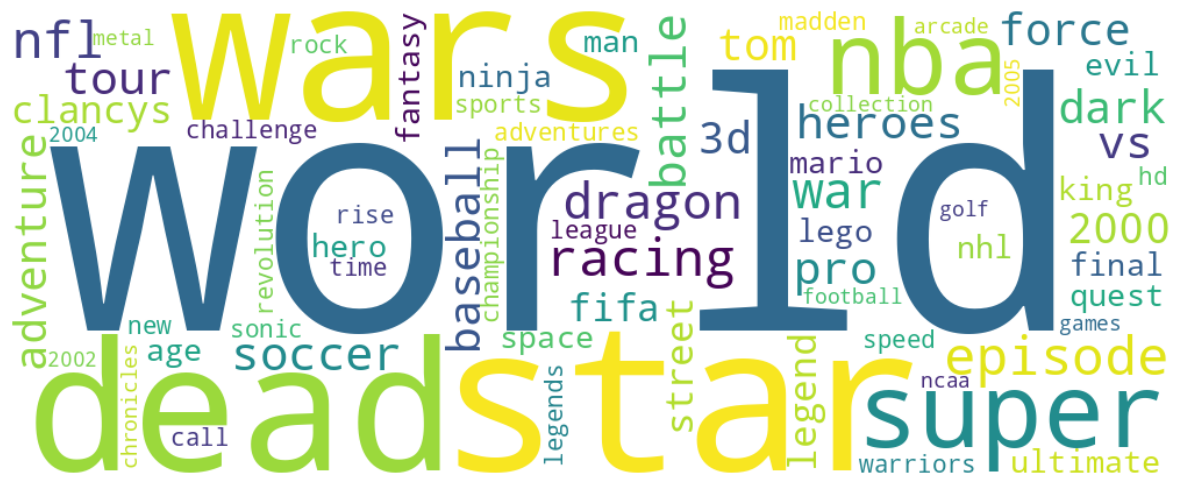

In [42]:
# @title 10.3 Word Cloud
# Create a dictionary from the filtered_word_counts_df
word_freq = dict(zip(filtered_word_counts_df['Word'], filtered_word_counts_df['Count']))

wordcloud = WordCloud(width=1000, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)


# Display the generated image:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()